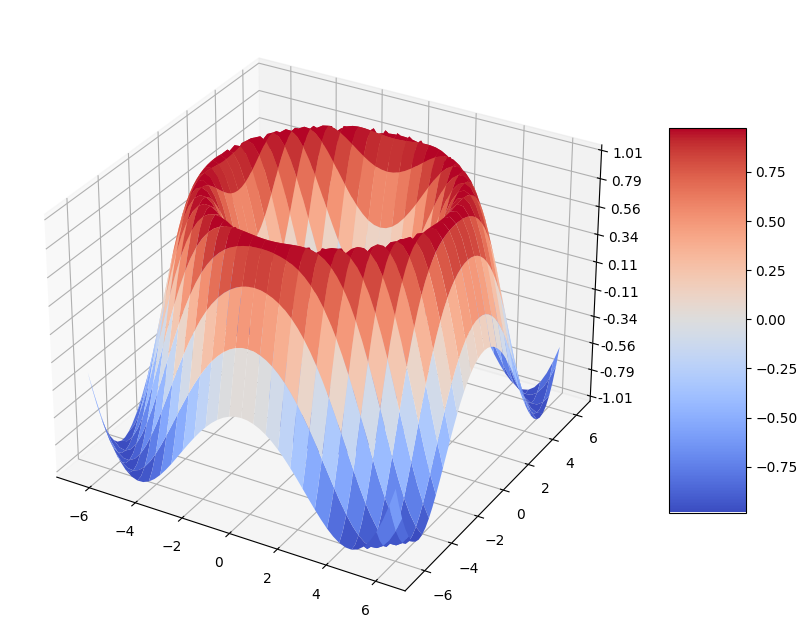

In [63]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))


# Make data.
X = np.arange(-6.5, 6.5, 0.25)
Y = np.arange(-6.5, 6.5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = -np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [64]:
import numpy as np

# Definir la función de pérdida
def loss_func(theta):
    x, y = theta
    R = np.sqrt(x**2 + y**2)
    return -np.sin(R)

# Definir el gradiente de la función de pérdida
def evaluate_gradient(loss_func, x_train, y_train, theta):
    x, y = theta
    R = np.sqrt(x**2 + y**2)
    grad_x = -np.cos(R) * (x / R)
    grad_y = -np.cos(R) * (y / R)
    return np.array([grad_x, grad_y])

# Gradiente descendente
def gd(theta, x_train, y_train, loss_func, epochs, eta):
    for i in range(epochs):
        gradient = evaluate_gradient(loss_func, x_train, y_train, theta)
        theta -= eta * gradient
        # theta = theta - eta * gradient
    return theta, gradient

# Parámetros iniciales
theta_init = np.array([2.0, 2.0])  # Puedes elegir cualquier punto inicial
eta = 0.1  # Tasa de aprendizaje
epochs = 10000  # Número de iteraciones

# Ejecutar gradiente descendente
theta_final1, gradient_final = gd(theta_init, None, None, loss_func, epochs, eta)
print(f"El punto mínimo aproximado es: {theta_final1}")

El punto mínimo aproximado es: [1.11072073 1.11072073]


In [65]:
import numpy as np

# Definir la función de pérdida
def loss_func(theta):
    x, y = theta
    R = np.sqrt(x**2 + y**2)
    return -np.sin(R)

# Definir el gradiente de la función de pérdida
def evaluate_gradient(loss_func, x, y, theta):
    R = np.sqrt(x**2 + y**2)
    grad_x = -np.cos(R) * (x / R)
    grad_y = -np.cos(R) * (y / R)
    return np.array([grad_x, grad_y])

# Gradiente descendente estocástico
def sgd(theta, data_train, loss_func, epochs, eta):
    for i in range(epochs):
        np.random.shuffle(data_train)  # Barajar los datos en cada época
        for example in data_train:
            x, y = example
            gradient = evaluate_gradient(loss_func, x, y, theta)
            theta = theta - eta * gradient  # Actualizar los parámetros con el gradiente
    return theta, gradient

# Generar datos de entrenamiento (pueden ser puntos aleatorios en el plano)
n_points = 100
x_train = np.random.uniform(-6.5, 6.5, n_points)
y_train = np.random.uniform(-6.5, 6.5, n_points)
data_train = list(zip(x_train, y_train))  # Crear pares de datos (x, y)

# Parámetros iniciales
theta_init = np.array([2.0, 2.0])  # Punto inicial
eta = 0.01  # Tasa de aprendizaje inicial
epochs = 10000  # Número de épocas

# Ejecutar el SGD
theta_final2, gradient_final = sgd(theta_init, data_train, loss_func, epochs, eta)
print(f"El punto mínimo aproximado es: {theta_final2}")

El punto mínimo aproximado es: [ 941.59605089 -343.91413473]


In [66]:
import numpy as np

# Definir la función de pérdida
def loss_func(theta):
    x, y = theta
    R = np.sqrt(x**2 + y**2)
    return -np.sin(R)

# Definir el gradiente de la función de pérdida
def evaluate_gradient(loss_func, x, y, theta):
    R = np.sqrt(x**2 + y**2)
    grad_x = -np.cos(R) * (x / R)
    grad_y = -np.cos(R) * (y / R)
    return np.array([grad_x, grad_y])

# RMSprop
def rmsprop(theta, data_train, loss_func, epochs, eta=0.001, decay=0.9, epsilon=1e-8):
    E_g2 = np.zeros_like(theta)  # Inicializar E[g^2] en cero
    for epoch in range(epochs):
        np.random.shuffle(data_train)  # Barajar los datos
        for example in data_train:
            x, y = example
            gradient = evaluate_gradient(loss_func, x, y, theta)
            
            # Actualizar el promedio del cuadrado del gradiente
            E_g2 = decay * E_g2 + (1 - decay) * gradient**2
            
            # Actualizar los parámetros usando RMSprop
            theta -= eta / (np.sqrt(E_g2) + epsilon) * gradient
            
    return theta

# Generar datos de entrenamiento (pueden ser puntos aleatorios en el plano)
n_points = 100
x_train = np.random.uniform(-6.5, 6.5, n_points)
y_train = np.random.uniform(-6.5, 6.5, n_points)
data_train = list(zip(x_train, y_train))  # Crear pares de datos (x, y)

# Parámetros iniciales
theta_init = np.array([2.0, 2.0])  # Punto inicial
epochs = 10000  # Número de épocas

# Ejecutar RMSprop
theta_final3 = rmsprop(theta_init, data_train, loss_func, epochs)
print(f"El punto mínimo aproximado es: {theta_final3}")

El punto mínimo aproximado es: [-179.08249957   -0.56842647]


In [67]:
import numpy as np

# Definir la función de pérdida
def loss_func(theta):
    x, y = theta
    R = np.sqrt(x**2 + y**2)
    return -np.sin(R)

# Definir el gradiente de la función de pérdida
def evaluate_gradient(loss_func, x, y, theta):
    R = np.sqrt(x**2 + y**2)
    grad_x = -np.cos(R) * (x / R)
    grad_y = -np.cos(R) * (y / R)
    return np.array([grad_x, grad_y])

# Algoritmo Adam
def adam(theta, data_train, loss_func, epochs, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = np.zeros_like(theta)  # Inicializar el momento de primer orden
    v = np.zeros_like(theta)  # Inicializar el momento de segundo orden
    t = 0  # Inicializar el contador de iteraciones

    for epoch in range(epochs):
        np.random.shuffle(data_train)  # Barajar los datos
        for example in data_train:
            x, y = example
            t += 1  # Incrementar el contador
            gradient = evaluate_gradient(loss_func, x, y, theta)

            # Actualizar los momentos de primer y segundo orden
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * (gradient**2)

            # Corrección de sesgo para momentos de primer y segundo orden
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)

            # Actualización de los parámetros
            theta -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    return theta

# Generar datos de entrenamiento (pueden ser puntos aleatorios en el plano)
n_points = 100
x_train = np.random.uniform(-6.5, 6.5, n_points)
y_train = np.random.uniform(-6.5, 6.5, n_points)
data_train = list(zip(x_train, y_train))  # Crear pares de datos (x, y)

# Parámetros iniciales
theta_init = np.array([2.0, 2.0])  # Punto inicial
epochs = 10000  # Número de épocas

# Ejecutar Adam
theta_final4 = adam(theta_init, data_train, loss_func, epochs)
print(f"El punto mínimo aproximado es: {theta_final4}")

El punto mínimo aproximado es: [-199.39494322   -1.60623923]


In [68]:
# Función para calcular la distancia al origen (0, 0)
def distance_to_origin(point):
    return np.sqrt(point[0]**2 + point[1]**2)

In [77]:
# Calcular las distancias al origen para cada método
distance_gd = distance_to_origin(theta_final1)  # Para Gradiente Descendente
distance_sgd = distance_to_origin(theta_final2)  # Para Gradiente Descendente Estocástico
distance_rmsprop = distance_to_origin(theta_final3)  # Para RMSprop
distance_adam = distance_to_origin(theta_final4)  # Para Adam

In [78]:
# Crear un diccionario con las distancias
distances = {
    "Gradiente Descendente": distance_gd,
    "Gradiente Descendente Estocástico": distance_sgd,
    "RMSprop": distance_rmsprop,
    "Adam": distance_adam
}

# Encontrar el mejor método (con la menor distancia al origen)
best_method = min(distances, key=distances.get)
print(f"\nEl mejor método es {best_method} con una distancia al origen de {distances[best_method]}")


El mejor método es Gradiente Descendente con una distancia al origen de 1.5707963267948981


In [79]:
# Imprimir resultados
for method, dist in distances.items():
    print(f"Distancia del método {method} al origen: {dist:.6f}")

# Crear tabla de frecuencias
results_df = pd.DataFrame(list(distances.items()), columns=['Method', 'Distance'])
results_df['Rank'] = results_df['Distance'].rank(method='min')
print(results_df)

Distancia del método Gradiente Descendente al origen: 1.570796
Distancia del método Gradiente Descendente Estocástico al origen: 1002.437058
Distancia del método RMSprop al origen: 179.083402
Distancia del método Adam al origen: 199.401413
                              Method     Distance  Rank
0              Gradiente Descendente     1.570796   1.0
1  Gradiente Descendente Estocástico  1002.437058   4.0
2                            RMSprop   179.083402   2.0
3                               Adam   199.401413   3.0
